In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

import ast
sys.path.append('src/data')
import data_loader

from transformers import pipeline
from collections import defaultdict
from transformers import pipeline
import plotly.express as px
import plotly.graph_objects as go


## Analysis of the plot summaries datatset

In [4]:
# Load the plot summaries
file_path_plot_summaries = "data/raw/plot_summaries.txt"
column_names = ["wikipedia_movie_id", "plot"]

# df_plot_summaries = data_loader.load_csv(file_path_plot_summaries, is_tsv=True, column_names = column_names)
# df_plot_summaries.head()

df_plot_summaries = pd.read_csv(file_path_plot_summaries, sep="\t", names=column_names)
df_plot_summaries


,wikipedia_movie_id,plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...
...,...,...
42298,34808485,"The story is about Reema , a young Muslim scho..."
42299,1096473,"In 1928 Hollywood, director Leo Andreyev look..."
42300,35102018,American Luthier focuses on Randy Parsons’ tra...
42301,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se..."


In [5]:
# Filtering of the movies which are not in our other filtered dataset
df_imdb_metadata_filtered = pd.read_csv('data/processed/imdb_ratings.csv')
df_plot_summaries_filtered = df_plot_summaries[df_plot_summaries['wikipedia_movie_id'].isin(df_imdb_metadata_filtered['wikipedia_movie_id'])]
df_plot_summaries_filtered.reset_index(drop=True, inplace=True)

# For more readibility
df_plot_summaries = df_plot_summaries_filtered.copy()

In [6]:
# Add the movie title to the plot summaries
file_movies_metadata = 'data/processed/movies_metadata.csv'
df_movies_metadata = pd.read_csv(file_movies_metadata)

df_plot_summaries_filtered['movie_title'] = df_plot_summaries['wikipedia_movie_id'].map(df_movies_metadata.set_index('wikipedia_movie_id')['movie_name'].to_dict())
df_plot_summaries_filtered

/var/folders/k_/bt3vq8js7dj20j_vsnbgyz000000gn/T/ipykernel_41425/2410857413.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_summaries_filtered['movie_title'] = df_plot_summaries['wikipedia_movie_id'].map(df_movies_metadata.set_index('wikipedia_movie_id')['movie_name'].to_dict())


,wikipedia_movie_id,plot,movie_title
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",Taxi Blues
1,20663735,Poovalli Induchoodan is sentenced for six yea...,Narasimham
2,2231378,"The Lemon Drop Kid , a New York City swindler,...",The Lemon Drop Kid
3,595909,Seventh-day Adventist Church pastor Michael Ch...,A Cry in the Dark
4,5272176,The president is on his way to give a speech. ...,End Game
...,...,...,...
28722,30352708,Twenty-something Eun-mo listens to a taxi driv...,Paju
28723,2867597,"An attempt to bring the famed ""Mr. Bill"" clay ...",Mr. Bill's Real Life Adventures
28724,1096473,"In 1928 Hollywood, director Leo Andreyev look...",The Last Command
28725,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",Kabuliwala


In [7]:
# Add the number of words of each plot summary
df_plot_summaries['plot_length'] = df_plot_summaries['plot'].apply(lambda x: len(x.split()))
df_plot_summaries

,wikipedia_movie_id,plot,plot_length
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",25
1,20663735,Poovalli Induchoodan is sentenced for six yea...,496
2,2231378,"The Lemon Drop Kid , a New York City swindler,...",849
3,595909,Seventh-day Adventist Church pastor Michael Ch...,397
4,5272176,The president is on his way to give a speech. ...,344
...,...,...,...
28722,30352708,Twenty-something Eun-mo listens to a taxi driv...,222
28723,2867597,"An attempt to bring the famed ""Mr. Bill"" clay ...",127
28724,1096473,"In 1928 Hollywood, director Leo Andreyev look...",524
28725,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",230


In [8]:
# Add the director and their gender for each plot summary
df_movies_directors = pd.read_csv('data/processed/movies_director.csv')
df_movies_directors

df_plot_summaries['director'] = df_plot_summaries['wikipedia_movie_id'].map(df_movies_directors.set_index('wikipedia_movie_id')['Director'].to_dict())
df_plot_summaries['director_gender'] = df_plot_summaries['wikipedia_movie_id'].map(df_movies_directors.set_index('wikipedia_movie_id')['Gender'].to_dict())
df_plot_summaries

,wikipedia_movie_id,plot,plot_length,director,director_gender
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",25,Pavel Lungin,M
1,20663735,Poovalli Induchoodan is sentenced for six yea...,496,Shaji Kailas,M
2,2231378,"The Lemon Drop Kid , a New York City swindler,...",849,Sidney Lanfield Frank Tashlin (uncredited),M
3,595909,Seventh-day Adventist Church pastor Michael Ch...,397,Fred Schepisi,M
4,5272176,The president is on his way to give a speech. ...,344,Andy Cheng,M
...,...,...,...,...,...
28722,30352708,Twenty-something Eun-mo listens to a taxi driv...,222,Park Chan-ok,M
28723,2867597,"An attempt to bring the famed ""Mr. Bill"" clay ...",127,Jim Drake,M
28724,1096473,"In 1928 Hollywood, director Leo Andreyev look...",524,Josef von Sternberg,M
28725,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",230,Hemen Gupta,F


## Sentiment Analysis

In [9]:
# Charger le pipeline avec un modèle d'émotion spécifique
emotion_pipeline = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)

# Analyser un résumé de film pour détecter les émotions
text = df_plot_summaries['plot'][0]
result = emotion_pipeline(text)

/Users/maximilien/miniconda3/lib/python3.9/site-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [10]:
# Function for analyzing the emotion of a text
def emotion_analysis(text):
    chunks = [text[i:i+512] for i in range(0, len(text), 512)]
    results = [emotion_pipeline(chunk) for chunk in chunks]

    # Initialize a dictionary to accumulate scores for each emotion
    emotion_scores = defaultdict(list)

    #Process each chunk and accumulate scores
    for chunk_result in results:
        for emotion in chunk_result:
            for i in range(len(emotion)):
                emotion_scores[emotion[i]['label']].append(emotion[i]['score'])
            #print(emotion_scores[emotion['label']])
            #emotion_scores[emotion['label']].append(emotion['score'])

    # Calculate the average score for each emotion
    average_scores = {emotion: sum(scores) / len(scores) for emotion, scores in emotion_scores.items()}

    return average_scores

In [11]:
# get the emotions and dominant emotion for the first n plots
def n_first_emotions(n, df):
    df = df_plot_summaries.head(n)
    df['emotion_scores'] = df['plot'].apply(emotion_analysis)
    df['dominant_emotion'] = df['emotion_scores'].apply(lambda x: max(x, key=x.get))
    return df

In [ ]:
# 1000 first plots
df_plot_summaries_emotions_1000 = n_first_emotions(1000, df_plot_summaries)

In [60]:
def emotion_score_big_dataset_csv(df, output_file, from_index, to_index, batch_size):
    for i in range(from_index, to_index, batch_size):
        batch = df.iloc[i:i + batch_size]

        batch['emotion_scores'] = batch['plot'].apply(emotion_analysis)
        batch['dominant_emotion'] = batch['emotion_scores'].apply(lambda x: max(x, key=x.get))

        batch.to_csv(output_file, mode='a', index=False, header=not os.path.exists(output_file))




output_file = 'src/data/external_data/plot_emotions.csv'
#emotion_score_big_dataset_csv(df_plot_summaries, output_file, 0, df_plot_summaries.shape[0], batch_size=100)


In [14]:
df_plot_emotions = pd.read_csv('src/data/external_data/plot_emotions.csv')
df_plot_emotions

,wikipedia_movie_id,plot,plot_length_nb_words,director,director_gender,emotion_scores,dominant_emotion
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",25,Pavel Lungin,M,"{'anger': 0.1000807136297226, 'disgust': 0.094...",surprise
1,20663735,Poovalli Induchoodan is sentenced for six yea...,496,Shaji Kailas,M,"{'anger': 0.3795353445623602, 'disgust': 0.123...",anger
2,2231378,"The Lemon Drop Kid , a New York City swindler,...",849,Sidney Lanfield Frank Tashlin (uncredited),M,"{'anger': 0.22358500260161235, 'disgust': 0.07...",joy
3,595909,Seventh-day Adventist Church pastor Michael Ch...,397,Fred Schepisi,M,"{'anger': 0.12216404266655445, 'disgust': 0.12...",joy
4,5272176,The president is on his way to give a speech. ...,344,Andy Cheng,M,"{'anger': 0.4168489193543792, 'disgust': 0.024...",fear
...,...,...,...,...,...,...,...
28720,924835,Based on an original screenplay by Ryan T Youn...,394,Michael Lehmann,M,"{'anger': 0.5519161194562912, 'disgust': 0.050...",anger
28721,2939386,"This film follows the lead character, Max Hell...",34,Donald G. Jackson Scott Shaw,M,"{'anger': 0.05367462337017059, 'disgust': 0.18...",neutral
28722,33784082,"Speedy Gonzales, ""the fastest mouse in all Mex...",327,Friz Freleng Hawley Pratt (co-director),M,"{'anger': 0.10364894941449165, 'disgust': 0.12...",neutral
28723,16358705,"Conrad Birdie ([[Jesse Pearson , a popular roc...",723,George Sidney,M,"{'anger': 0.09477543815349539, 'disgust': 0.01...",sadness


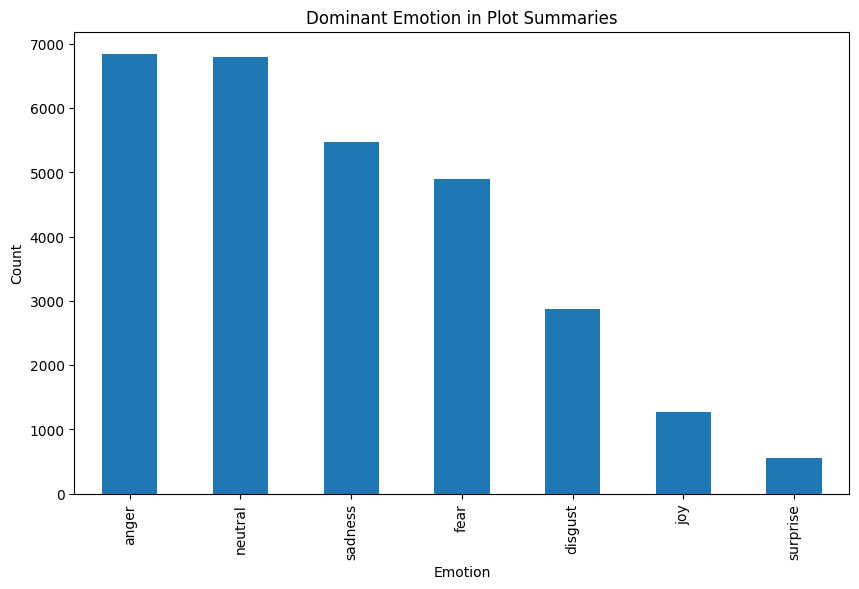

In [15]:
# Je veux en faire un graph 
plt.figure(figsize=(10, 6))
df_plot_emotions['dominant_emotion'].value_counts().plot(kind='bar')
plt.title('Dominant Emotion in Plot Summaries')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

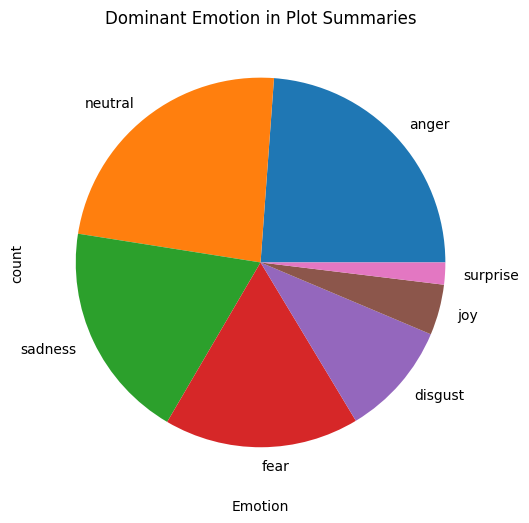

In [54]:
plt.figure(figsize=(10, 6))
df_plot_emotions['dominant_emotion'].value_counts().plot(kind='pie')
plt.title('Dominant Emotion in Plot Summaries')
plt.xlabel('Emotion')
plt.show()

In [56]:
fig = px.pie(
    df_plot_emotions,
    #values='count',  # Valeurs pour la taille des parts
    names='dominant_emotion',  # Noms des émotions
    title='Dominant Emotion in Plot Summaries',
    color_discrete_sequence=px.colors.qualitative.Set2  # Palette de couleurs
)

# Afficher le graphique
fig.show()

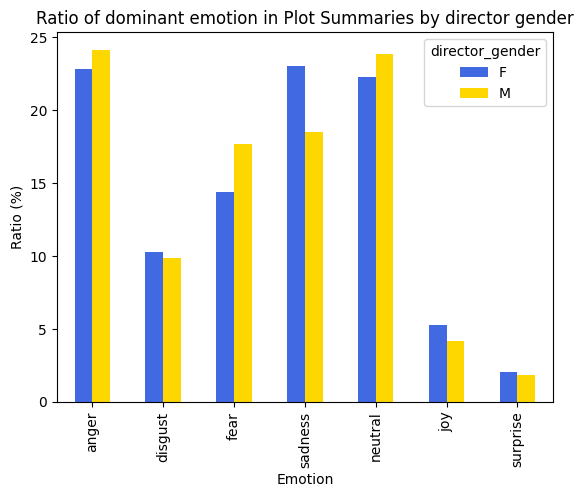

In [37]:
# Je veux avoir le nombre de director M et director F

df_plot_emotions_women = df_plot_emotions[df_plot_emotions['director_gender'] == 'F']
df_plot_emotions_men = df_plot_emotions[df_plot_emotions['director_gender'] == 'M']

# Je veux un graph dans lequel pour chaque dominant emotion, je veux le nombre de director M et F
character_type_gender_counts = df_plot_emotions.groupby(['dominant_emotion', 'director_gender']).size().unstack(fill_value=0)

character_type_gender_counts_ratio_women = character_type_gender_counts['F'] / character_type_gender_counts['F'].sum() * 100
character_type_gender_counts_ratio_men = character_type_gender_counts['M'] / character_type_gender_counts['M'].sum() * 100
character_type_gender_counts_ratio = character_type_gender_counts.copy(deep=True)

character_type_gender_counts_ratio['F'] = character_type_gender_counts_ratio_women
character_type_gender_counts_ratio['M'] = character_type_gender_counts_ratio_men

character_type_gender_counts_ratio = character_type_gender_counts_ratio.reindex(["anger", "disgust", "fear", "sadness", "neutral", "joy", "surprise"])

character_type_gender_counts_ratio.plot(kind='bar', stacked=False, color=['royalblue', 'gold'])
plt.title('Ratio of dominant emotion in Plot Summaries by director gender')
plt.xlabel('Emotion')
plt.ylabel('Ratio (%)')
plt.show()


In [28]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=character_type_gender_counts_ratio.index,
    y=character_type_gender_counts_ratio['F'],
    name='Female',
    marker_color='royalblue'
))

fig.add_trace(go.Bar(
    x=character_type_gender_counts_ratio.index,
    y=character_type_gender_counts_ratio['M'],
    name='Male',
    marker_color='gold'
))

# Mise en forme du graphique
fig.update_layout(
    title='Ratio of Dominant Emotion in Plot Summaries by Director Gender',
    xaxis=dict(title='Emotion'),
    yaxis=dict(title='Ratio (%)'),
    barmode='group',  # Utiliser des barres côte à côte
    legend=dict(title='Director Gender')
)

# Afficher le graphique interactif
fig.show()

In [31]:
# graphe araigné pour les dominant émotions

# Préparer les données pour le graphique araignée
categories = character_type_gender_counts_ratio.index.tolist()  # Les émotions
values_female = character_type_gender_counts_ratio['F'].tolist()  # Ratios pour les femmes
values_male = character_type_gender_counts_ratio['M'].tolist()  # Ratios pour les hommes

# Ajouter la première valeur à la fin pour fermer le graphique (cycle complet)
categories += [categories[0]]
values_female += [values_female[0]]
values_male += [values_male[0]]

# Créer le graphique araignée
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=values_female,
    theta=categories,
    fill='toself',
    name='Female Directors',
    marker_color='royalblue'
))

fig.add_trace(go.Scatterpolar(
    r=values_male,
    theta=categories,
    fill='toself',
    name='Male Directors',
    marker_color='gold'
))

# Mise en page du graphique
fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, max(max(values_female), max(values_male))])
    ),
    title='Ratio of Dominant Emotion in Plot Summaries by Director Gender',
    showlegend=True
)

# Afficher le graphique
fig.show()


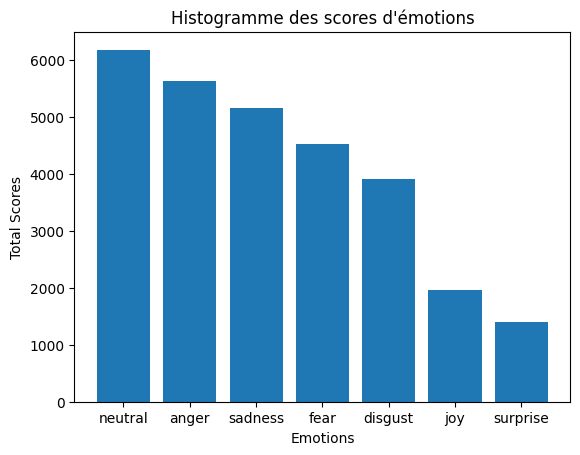

In [32]:
# Nouveau plot de la distribution des émotions au pro rata des scores de chaque emotion

emotion_totals = {
    'anger': 0,
    'disgust': 0,
    'fear': 0,
    'joy': 0,
    'neutral': 0,
    'sadness': 0,
    'surprise': 0
}

for emotion_score in df_plot_emotions['emotion_scores']:
    # Convertir la chaîne JSON en dictionnaire
    scores = ast.literal_eval(emotion_score)
    for emotion, score in scores.items():
        emotion_totals[emotion] += score

# plt.bar(emotion_totals.keys(), emotion_totals.values())
# plt.xlabel('Emotions')
# plt.ylabel('Total Scores')
# plt.title('Histogramme des scores d\'émotions')
# plt.show()


sorted_emotion_totals = dict(sorted(emotion_totals.items(), key=lambda item: item[1], reverse=True))
plt.bar(sorted_emotion_totals.keys(), sorted_emotion_totals.values())
plt.xlabel('Emotions')
plt.ylabel('Total Scores')
plt.title('Histogramme des scores d\'émotions')
plt.show()


In [46]:
emotion_totals_women = {
    'anger': 0,
    'disgust': 0,
    'fear': 0,
    'joy': 0,
    'neutral': 0,
    'sadness': 0,
    'surprise': 0
}

emotion_totals_men = {
    'anger': 0,
    'disgust': 0,
    'fear': 0,
    'joy': 0,
    'neutral': 0,
    'sadness': 0,
    'surprise': 0
}

for emotion_score in df_plot_emotions_women['emotion_scores']:
    # Convertir la chaîne JSON en dictionnaire
    scores = ast.literal_eval(emotion_score)
    for emotion, score in scores.items():
        emotion_totals_women[emotion] += score

for emotion_score in df_plot_emotions_men['emotion_scores']:
    # Convertir la chaîne JSON en dictionnaire
    scores = ast.literal_eval(emotion_score)
    for emotion, score in scores.items():
        emotion_totals_men[emotion] += score


# Calcul des ratios
total_women = sum(emotion_totals_women.values())
total_men = sum(emotion_totals_men.values())

ratios_women = {emotion: value / total_women * 100 for emotion, value in emotion_totals_women.items()}
ratios_men = {emotion: value / total_men * 100 for emotion, value in emotion_totals_men.items()}

# Transformation en DataFrame pour Plotly
df = pd.DataFrame({
    'Emotion': list(ratios_women.keys()),
    'Women': list(ratios_women.values()),
    'Men': list(ratios_men.values())
})

# Création du graphique avec couleurs personnalisées
fig = px.bar(
    df,
    x='Emotion',
    y=['Women', 'Men'],
    title='Ratio of Emotions by Gender',
    labels={'value': 'Ratio (%)', 'Emotion': 'Emotion'},
    barmode='group',
    #text_auto='.2f',
    color_discrete_map={
        "Women": "royalblue",
        "Men": "gold"
    }
)

# Personnalisation (couleurs, légende, axes)
fig.update_traces(marker=dict(opacity=0.8))
fig.update_layout(
    xaxis_title="Emotion",
    yaxis_title="Ratio (%)",
    legend_title="Director Gender",
    template="plotly_white"
)

# Afficher le graphique interactif
fig.show()